### Importing the Necessary Packages

In [15]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from preprocessing import save_insurance_data_to_csv, missing_values_table, get_categorical_columns, get_unique_values_count, update_gender_based_on_title

### CHANGING THE TEXT DATA TO CSV

In [5]:
# Example usage
text_file_path = r'C:\Users\Blen\OneDrive\Documents\10Academy\Week3\Data\MachineLearningRating_v3.txt'  # Replace with your actual file path
save_insurance_data_to_csv(text_file_path)

c:\Users\Blen\OneDrive\Desktop\10Academy\InsuranceCompanyMarketOptimization\scripts\preprocessing.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, delimiter='|')


Data saved to c:\Users\Blen\OneDrive\Desktop\10Academy\InsuranceCompanyMarketOptimization\data\insurance_data.csv


### READING THE CSV DATA

In [4]:
df = pd.read_csv('..\data\insurance_data.csv')

C:\Users\Blen\AppData\Local\Temp\ipykernel_3260\584046861.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\data\insurance_data.csv')


In [ ]:
df.head()

### EXPLORING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Checking for missing values

In [14]:
missing_values_info = missing_values_table(df)
missing_values_info.head()

The dataframe has 52columns.
There are 22 columns that have missing values.



,Missing Values,% of Total Values,DType
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
WrittenOff,641901,64.2,object
Converted,641901,64.2,object


Getting the unique values for every categorical data

In [6]:
unique_values = get_unique_values_count(df, get_categorical_columns(df))

In [14]:
unique_values.head()

,Column,Unique Value,Count,Percentage
52,AccountType,Current account,597938,62.29
53,AccountType,Savings account,358207,37.32
54,AccountType,Transmission account,3721,0.39
782,AlarmImmobiliser,Yes,999861,99.98
783,AlarmImmobiliser,No,237,0.02


In [21]:
unique_values.loc[unique_values['Column'] == 'Title'].head()

,Column,Unique Value,Count,Percentage
35,Title,Mr,933555,93.35
36,Title,Mrs,45850,4.58
37,Title,Ms,13269,1.33
38,Title,Miss,6614,0.66
39,Title,Dr,810,0.08


In [22]:
unique_values.loc[unique_values['Column'] == 'Gender'].head()

,Column,Unique Value,Count,Percentage
58,Gender,Not specified,940990,95.00
59,Gender,Male,42817,4.32
60,Gender,Female,6755,0.68


#### Deriving 'Not specified' Values of Gender from Title

In [5]:
df = update_gender_based_on_title(df, 'Title','Gender')

In [11]:
unique_values = get_unique_values_count(df, get_categorical_columns(df))

In [12]:
unique_values.loc[unique_values['Column'] == 'Gender'].head()

,Column,Unique Value,Count,Percentage
58,Gender,Male,924019,93.28
59,Gender,Female,65733,6.64
60,Gender,Not specified,810,0.08


### UNIVARIATE ANALYSIS

#### FOR TITLE

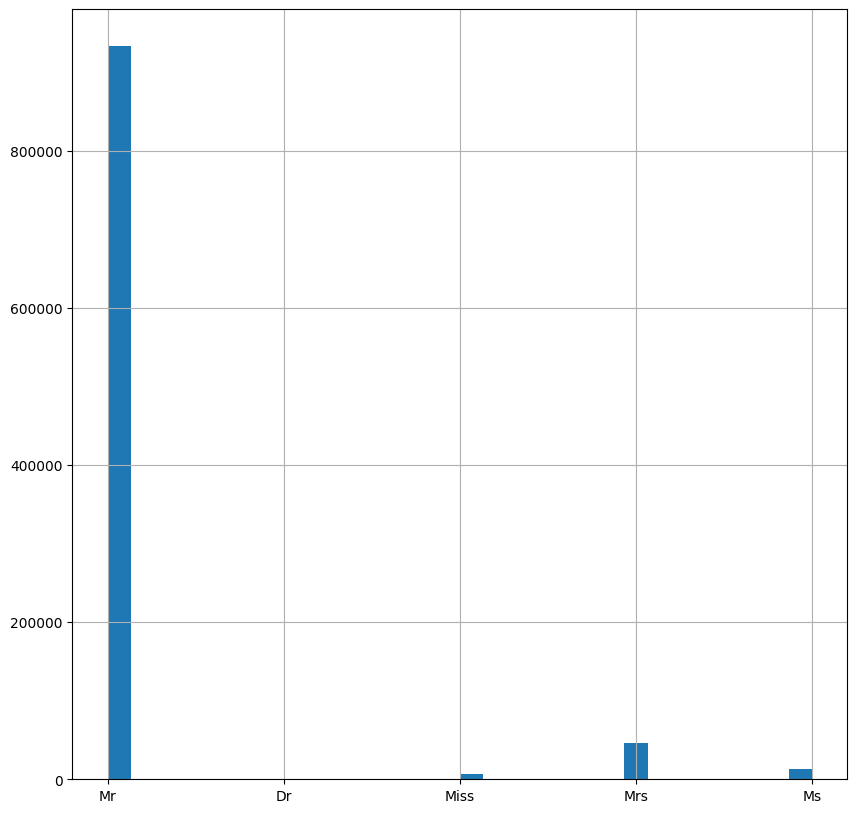

In [19]:
df['Title'].hist(bins=30, figsize=(10, 10))
plt.show()

#### FOR GENDER

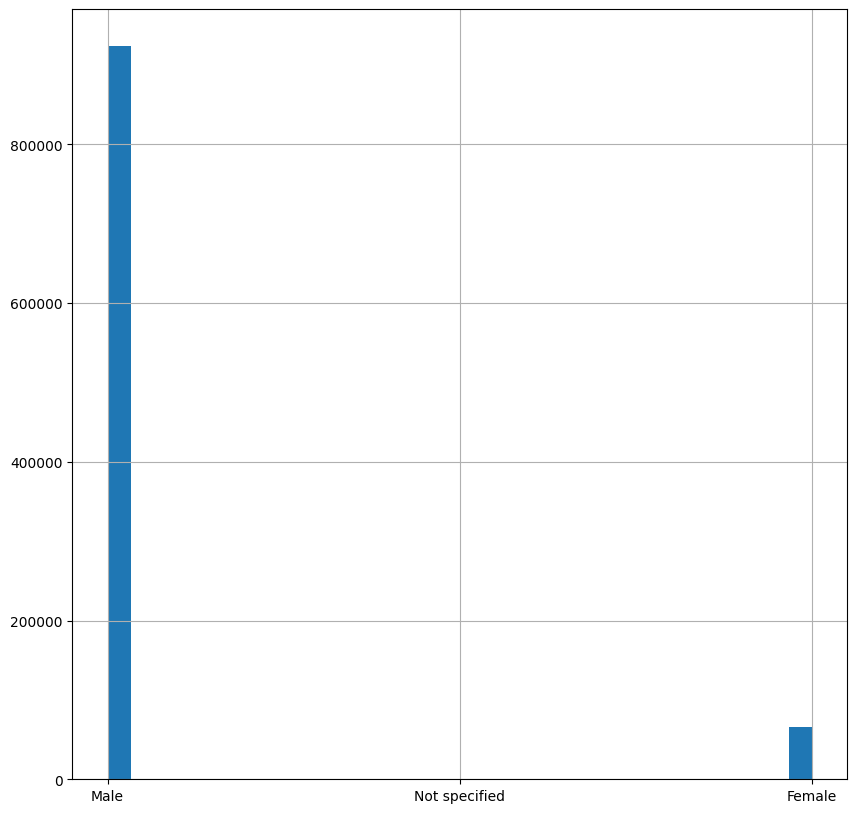

In [20]:
df['Gender'].hist(bins=30, figsize=(10, 10))
plt.show()

#### FOR PROVINCE

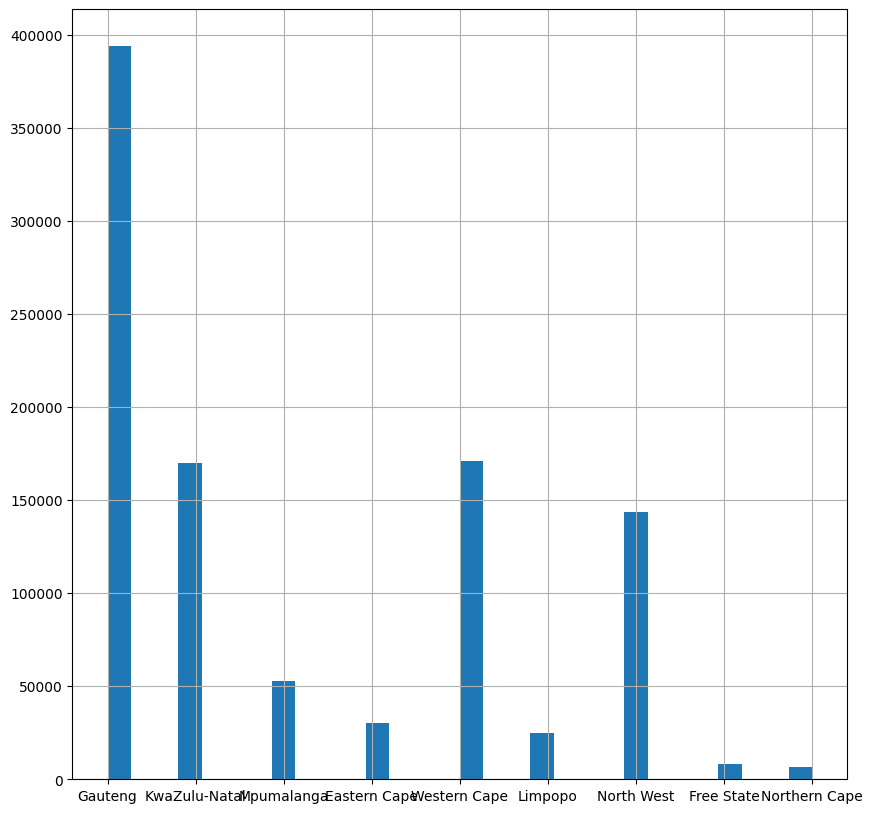

In [21]:
df['Province'].hist(bins=30, figsize=(10, 10))
plt.show()